# DSCI 100 Project: Linear Regression Predicting Tennis Prize Money Earnings
#### By Harmony Allan-Mah, Brandon Hui, Leo Qu and Elena Zettelmeyer

### Introduction 

Tennis is a popular game enjoyed worldwide, with approximately 87 million players in 2019, and 973 million viewers or Association of Tennis Professionals (ATP) events in 2015 (Czermak). Because of its popularity, many recreational players may consider trying to play professionally to gain potential fame and wealth, but little is known about what exactly may lead to high earnings and success in professional Tennis. Fortunately, Ultimate Tennis Statistics contains a dataset named “Player Stats for Top 500 Players”, which provides useful information about men’s singles games, including each player’s age, the number of seasons they’ve played, their height, various forms of rankings, and the amount of prize money they earn. The dataset has a total of 500 rows (one for each player) and 38 columns consisting of various variables, but only 9 of which are of interest to us. With this data, we can get a better sense of what factors may predict financial success in men’s singles tennis. In this project, we have conducted a linear regression model to answer the predictive question: **how do tennis player’s age, seasons, height, and various rankings influence the prize money that they can make?**, using the following 9 predictors: 
- Age
- Number of seasons a player has played in their career
- Where a player’s current elo* ranks 
- Where a player’s best elo* ranks
- Peak Elo Rating
- Player height
- Current Rank
- Best Rank
- A player’s ranking amongst the Greatest (tennis players) of all Time 

Elo* is an estimate of a tennis player’s general strength and ability, and is often used in the ATP.  If a player wins, their Elo increases, and vice versa


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Age,Seasons,Current.Elo.Rank,Best.Elo.Rank,Peak.Elo.Rating,Height,Current.Rank,Best.Rank,GOAT.Rank,Prize.Money
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,11,1826,21,2037,193,183,17,264,6091971
31,14,2211,3,2329,198,121,3,33,25889586
33,14,1791,29,2004,190,130,19,264,10821168
32,15,1993,18,2068,198,45,11,157,11912152
32,16,2004,14,2112,178,12,9,151,13470614
29,11,1892,35,1962,180,27,23,357,4850190
32,13,1860,44,1946,190,161,33,357,7114496
27,11,1845,38,1953,183,304,40,489,4660132
35,18,1879,21,2029,190,85,18,293,10581476


Age          Seasons Current.Elo.Rank    Best.Elo.Rank 
      0.18767662       0.42030470       0.77216326      -0.50019089 
 Peak.Elo.Rating           Height     Current.Rank        Best.Rank 
      0.84909376       0.02801205      -0.32429820      -0.49511756 
       GOAT.Rank      Prize.Money 
     -0.57507299       1.00000000

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)           Seasons      Current.Rank         Best.Rank  
      -532697372           1625314            -32394           -621968  
 Peak.Elo.Rating         GOAT.Rank     Best.Elo.Rank  Current.Elo.Rank  
          210195             63423           1290774             28785  


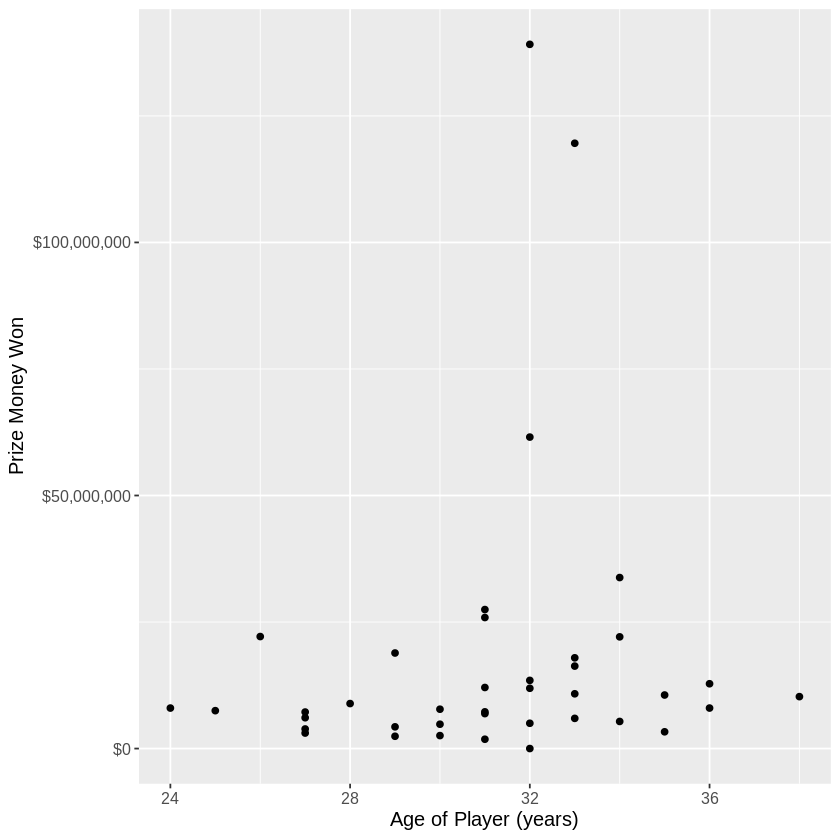

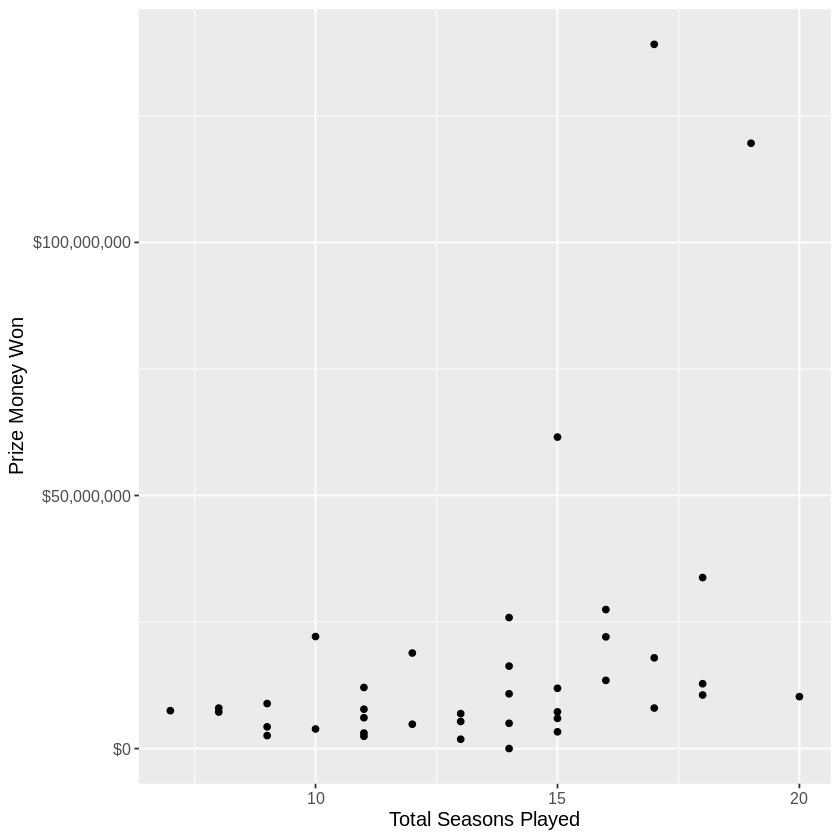

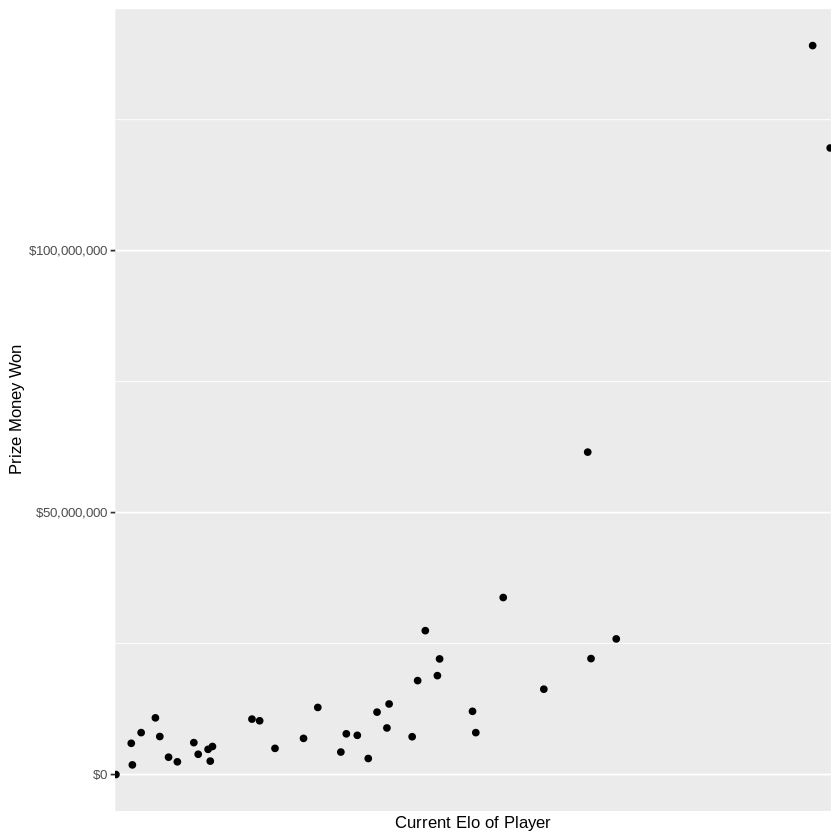

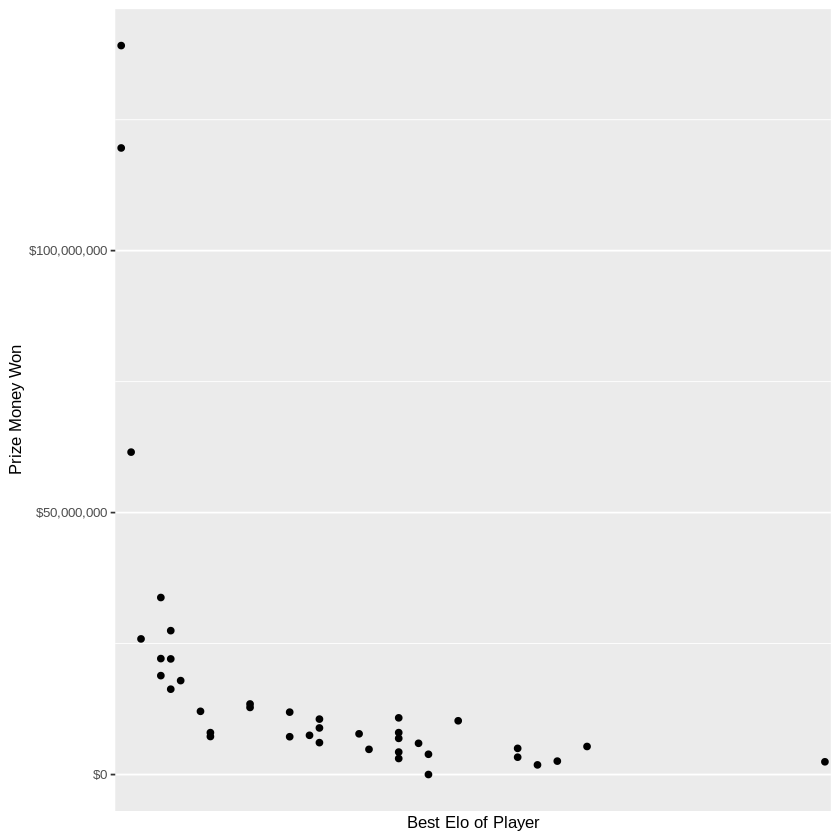

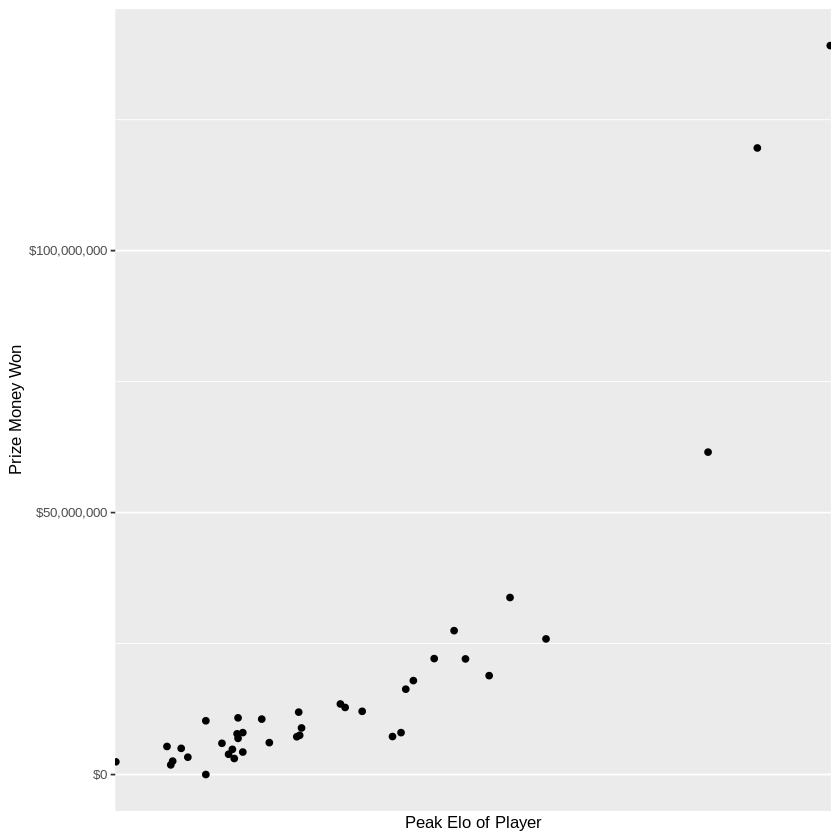

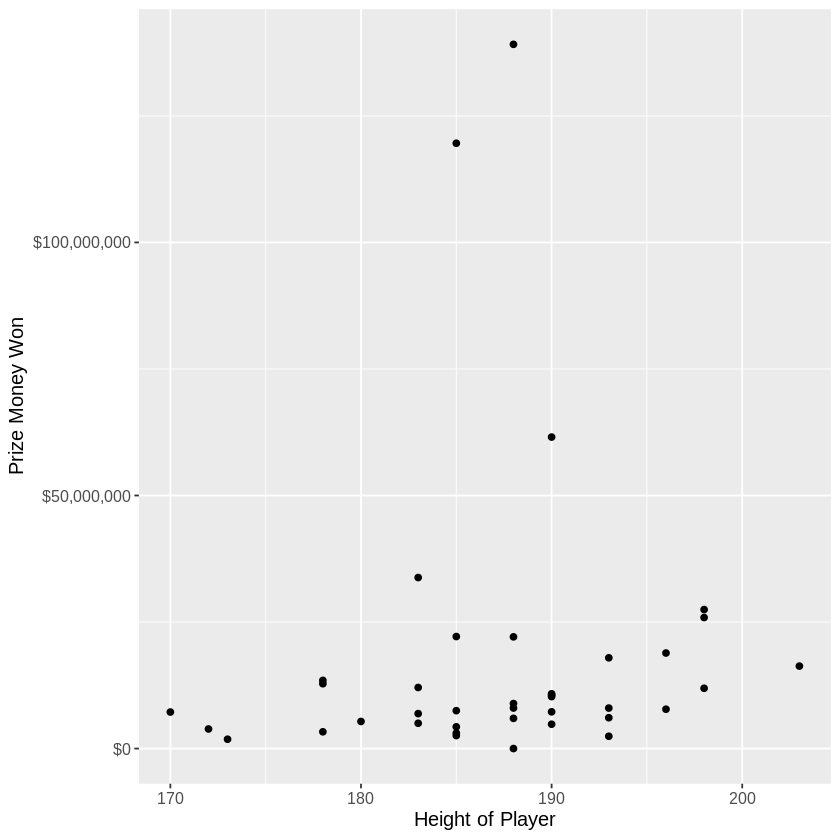

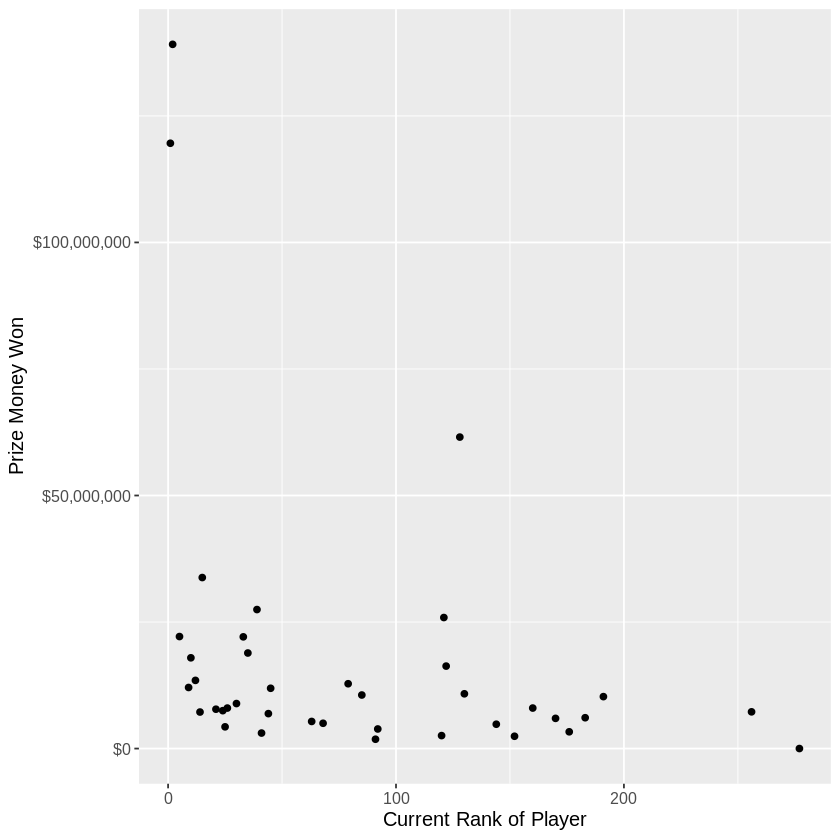

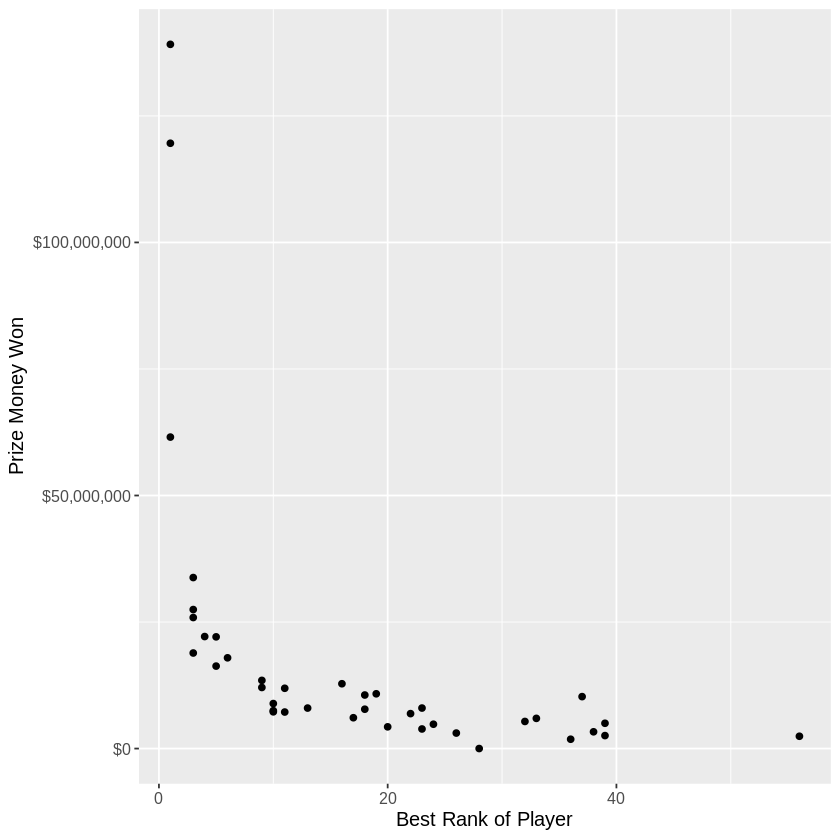

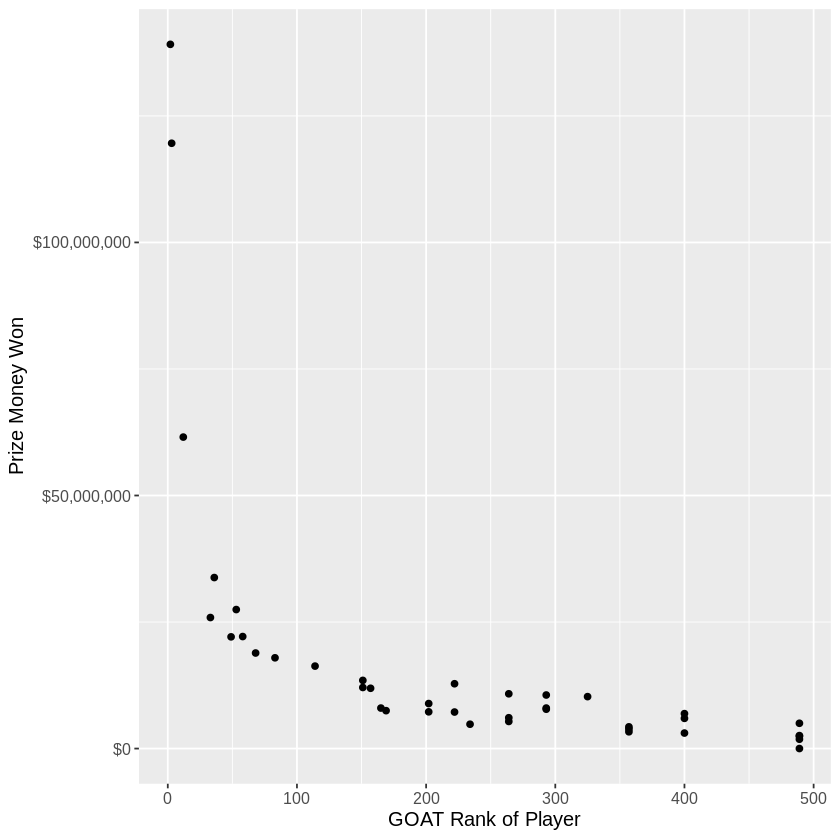

In [4]:
#<<<<<<< LOCAL CELL DELETED >>>>>>>
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(GGally)
library(gridExtra)

player_stats <- read_csv("data")

colnames(player_stats) <- make.names(colnames(player_stats), unique = TRUE)
player_stats_tidy <- player_stats |> filter(Active == "Yes", Current.Elo.Rank != "N/A", Height != "N/A", GOAT.Rank != "N/A") |> 
                                     select(Age, Seasons, Current.Elo.Rank, Best.Elo.Rank, Peak.Elo.Rating, Height, Current.Rank, Best.Rank, GOAT.Rank, Prize.Money) |> 
                                     mutate(Age = as.numeric(substr(Age, 1,2)), 
                                            Current.Rank = as.numeric(gsub("\\(.*?\\)", "", Current.Rank)),
                                            Best.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Rank)),
                                            Height = as.numeric(gsub("cm", "", Height)),
                                            Peak.Elo.Rating = as.numeric(gsub("\\(.*?\\)", "", Peak.Elo.Rating)),
                                            GOAT.Rank = as.numeric(gsub("\\(.*?\\)", "", GOAT.Rank)),
                                            Best.Elo.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Elo.Rank)),
                                            Current.Elo.Rank = as.numeric(gsub("[\\(\\)]", "", regmatches(Current.Elo.Rank, gregexpr("\\(.*?\\)", Current.Elo.Rank)))),
                                            Prize.Money = parse_number(Prize.Money))
player_stats_tidy

player_cor <- cor(player_stats_tidy)
player_cor[ , 10]

player_stats_split <- initial_split(player_stats_tidy, prop = 0.6, strata = Prize.Money)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split)

player_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")
player_recipe <- recipe(Prize.Money ~ Seasons + Current.Rank + Best.Rank
                        + Peak.Elo.Rating + GOAT.Rank + Best.Elo.Rank + Current.Elo.Rank,
                        data = player_stats_train)
player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(player_stats_train)
player_fit


player_age_plot <- ggplot(player_stats_train, aes(x = Age, y = Prize.Money)) +
  geom_point() +
  xlab("Age of Player (years)") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_seasons_plot <- ggplot(player_stats_train, aes(x = Seasons, y = Prize.Money)) +
  geom_point() +
  xlab("Total Seasons Played") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_elo_plot <- ggplot(player_stats_train, aes(x = Current.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_best_elo_plot <- ggplot(player_stats_train, aes(x = Best.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_peak_elo_plot <- ggplot(player_stats_train, aes(x = Peak.Elo.Rating, y = Prize.Money)) +
  geom_point() +
  xlab("Peak Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_height_plot <- ggplot(player_stats_train, aes(x = Height, y = Prize.Money)) +
  geom_point() +
  xlab("Height of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_rank_plot <- ggplot(player_stats_train, aes(x = Current.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_best_rank_plot <- ggplot(player_stats_train, aes(x = Best.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_goat_rank_plot <- ggplot(player_stats_train, aes(x = GOAT.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("GOAT Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_age_plot
player_seasons_plot
player_current_elo_plot
player_best_elo_plot
player_peak_elo_plot 
player_height_plot
player_current_rank_plot
player_best_rank_plot
player_goat_rank_plot